In [1]:
import numpy as np
import os

from osgeo import gdal
import matplotlib.pyplot as plt
import pandas as pd
from utils2 import *
import matplotlib.patches as patches
%matplotlib inline 
%load_ext autoreload
%autoreload 2

import argparse
import logging
import os
import time
import numpy as np
import data
from importlib import import_module
import shutil
from utils import *
import sys
sys.path.append('../')
from split_combine import SplitComb

import torch
from torch.nn import DataParallel
from torch.backends import cudnn
from torch.utils.data import DataLoader
from torch import optim
from torch.autograd import Variable
from config_training import config as config_training

from layers import acc, nms

In [2]:
model = import_module('res18')
config, net, loss, get_pbb = model.get_model()

dataset = data.DataBowl3Detector(
    config_training['preprocess_result_path'],
    '/home/htang6/workspace/dsb2018/filenames_train.csv',
    config,
    phase = 'train')

total number of examples  25467


In [10]:
data, target, coord = dataset[0]

In [11]:
data = data.numpy()
target = target.numpy()

[array([39, 43, 71, 83, 91, 91]), array([47, 55, 71, 51, 47, 55])]


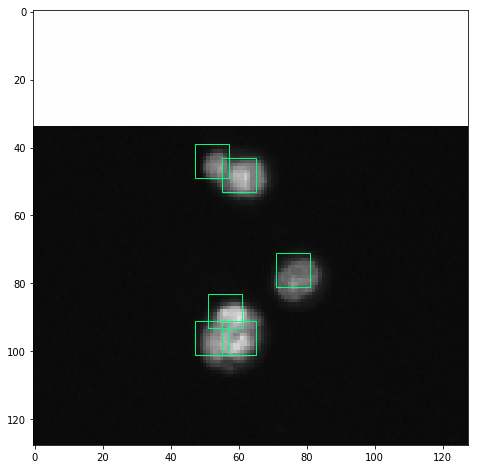

In [12]:
yy, xx, a = np.where(target[:,:,:,0]==1)
plt.rcParams['figure.figsize'] = (8.0, 8.0)

yy = yy * 4 - 5  
xx = xx * 4 - 5
print [yy, xx]

fig,ax = plt.subplots(1,1)
for i in xrange(len(yy)):
    yx_nod_rect = patches.Rectangle((xx[i],yy[i]),10,10,
                         linewidth=1,edgecolor='springgreen',facecolor='none')
    ax.add_patch(yx_nod_rect)
ax.imshow(np.moveaxis(data, 0, -1) * 128 + 128, cmap='gray')

In [51]:
yy, xx, aa = np.where(target[:,:,:,0]==-1)